## Confidence Intervals

### Objectives

1. Confidence Intervals calculation using Bootstrapping
2. Confidence Intervals calculation using z-value formula

### What is this "Confidence interval" we see in many public reports?

> ### Warm up: 
> **What is this "Confidence Interval" we see in many public reports?**
> - [Trump Approval Rate](https://www.economist.com/sites/default/files/images/print-edition/20200222_USC189.png) ([source](https://www.economist.com/united-states/2020/02/22/why-donald-trumps-high-approval-ratings-may-be-misleading))
> - [Germany Election 2021 Polls](https://blog.datawrapper.de/data-visualizations-german-election-2021-with-datawrapper/)
> - [Income Germany](https://www.gut-leben-in-deutschland.de/report/income/)
> - [Montana senator voting polls](https://www.strategies360.com/strategies-360-releases-exclusive-poll-with-nbc-montana/) (Margin of Error)

### What does Confidence Interval (CI) describe ??

 - **Confidence Interval** is a **range of values** that is likely to include a `population parameter` (a characteristic) with a certain **confidence level** (usually 95%)
 
 - In other words, confidence interval is simply a way to measure how well your sample represents the population you are studying

## Calculating Confidence Intervals
Calculating confidence intervals of a population parameter can be done using several methods. We will focus here on two methods that are most commonly used:

Bootstrapping (simulation)
Statistical formulas

### Method 1: Bootstrap sampling



***Bootstrapping*** is a statistical procedure that resamples a single dataset to create many simulated samples. The dataset is sampled with replacement. This means that each time an item is selected from the original dataset, it is not removed, allowing that item to possibly be selected again for the sample.

 Randomly selecting data and `allowing for duplicates` is called **Sampling With Replacement**

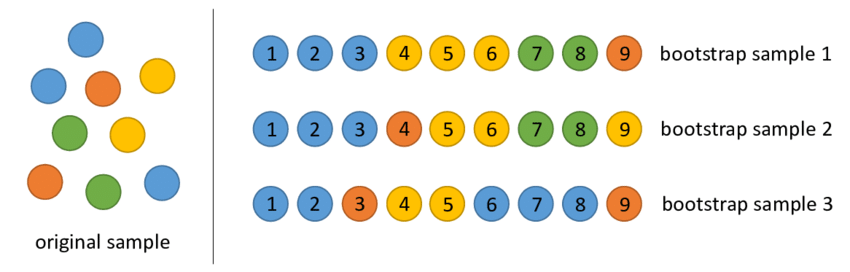

95% Confidence Interval is just the interval that covers 95% of the bootstrapped means

### Let's try it with penguins. 

### Assume that the dataset is a sample of a much higher penguin population

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# from seaborn import the penguin data

penguins = sns.load_dataset("penguins")

In [3]:
#  what are the unique species?

penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [4]:
# create a subset of one species

penguins_adelie = penguins[penguins['species']=='Adelie']

In [5]:
# what are the min and max values of the bill length? (for later proof that Confidence Interval is not just min/max)

min_value = penguins_adelie['bill_length_mm'].min()
max_value = penguins_adelie['bill_length_mm'].max()


# sample mean ?

mean_value = penguins_adelie['bill_length_mm'].mean().round(3)


min_value, mean_value, max_value

(32.1, 38.791, 46.0)

In [6]:
# let's keep this for the later comparisson in a dataframe

d= {
    'min': min_value,
    'mean' : mean_value,
    'max' : max_value
    }

pd.DataFrame([d])

,min,mean,max
0,32.1,38.791,46.0


### Q: What is the Confidence Interval for the `mean` of the bill length  for the Adelie species?

In [7]:
# extract the data: the bill_length_mm values

bill_length_adelie = penguins_adelie['bill_length_mm']

In [8]:
# what is the size of our sample?

len(bill_length_adelie)

152

In [9]:
# how do we take a sample with replacement ?? // Emphasize how to use 'frac=' vs 'n=' arguments.

bootstrap_sample = bill_length_adelie.sample(frac=1, replace='True') # frac=1 is equivalent to n = total count

print(len(bootstrap_sample), bootstrap_sample.mean()) # rerun a few times - note: the mean is changing

152 39.19933333333333


### that's one bootstrap sample. now we want 10.000 of bootstrap samples

In [10]:
# initialize sample means list

sample_means_list = []


# let's take 10_000 bootstrap samples and record their means

for i in range(10_000):
    bootstrap_sample = bill_length_adelie.sample(frac=1, replace='True')
    sample_means_list.append(bootstrap_sample.mean())

In [11]:
sample_means_list

[39.14078947368421,
 38.53333333333333,
 38.756,
 38.76754966887417,
 39.14473684210526,
 39.03684210526316,
 38.9078947368421,
 38.477631578947374,
 39.08,
 38.90855263157895,
 38.51059602649007,
 39.050657894736844,
 38.67666666666667,
 38.72119205298013,
 38.97880794701987,
 38.47549668874172,
 38.62052980132451,
 38.79736842105264,
 39.0728476821192,
 38.63533333333334,
 38.775496688741725,
 39.37748344370861,
 38.73486842105264,
 38.81059602649007,
 38.915789473684214,
 38.87828947368421,
 38.72147651006711,
 38.4445945945946,
 38.631788079470205,
 39.27368421052631,
 38.67000000000001,
 38.707947019867554,
 39.108666666666664,
 39.09144736842105,
 38.76423841059602,
 38.89868421052632,
 38.533112582781456,
 38.71,
 38.71986754966888,
 38.939597315436245,
 38.61907894736842,
 38.915131578947374,
 38.75,
 38.99533333333334,
 38.95973154362416,
 38.775657894736845,
 38.91324503311259,
 38.58466666666667,
 38.36066666666667,
 39.32697368421052,
 38.69072847682119,
 38.30800000000001,

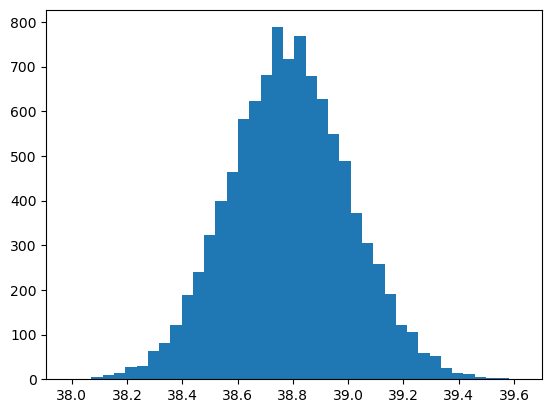

In [12]:
# let's plot the histogram of the sample means

plt.hist(sample_means_list, bins=40);

-----------------

### proceeding...

d:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


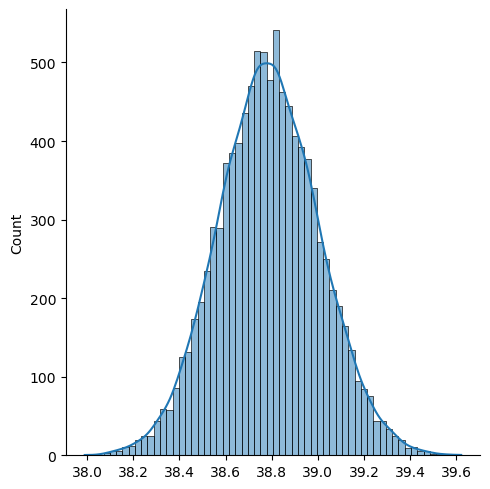

In [13]:
# using seaborn's displot

sns.displot(sample_means_list, kde=True);

# KDE (Kernel Density Estimation) = "technique that let’s you create a smooth curve given a set of data."

# Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable
# https://mathisonian.github.io/kde/
# https://www.youtube.com/watch?v=DCgPRaIDYXA

d:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


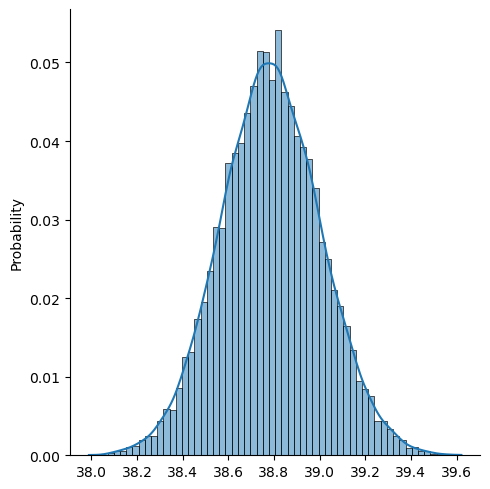

In [14]:
# same can be plotted for probability

sns.displot(sample_means_list, kde=True, stat="probability");

In [15]:
# let's calculate lower and upper quantiles for the 95% confidence level

clvl = 0.95

lower_quantile = (1-clvl)/2  

upper_qunatile = clvl + ((1-clvl)/2)

print(clvl, lower_quantile, upper_qunatile)

# in case anyone wonders why 0.025 has a weird "tail": https://docs.python.org/3/library/decimal.html 

0.95 0.025000000000000022 0.975


In [16]:
# first the list of sample means has to be changed to a pandas series

sample_means_series = pd.Series(sample_means_list)

# calculating lower and upper quantile values for the sample means
# pd.quantile() methods will return the values

lower_limit = sample_means_series.quantile(lower_quantile)

upper_limit = sample_means_series.quantile(upper_qunatile)

print(f'The Confidence Interval of the average bill_length of Adelie is between {lower_limit} and {upper_limit}')

The Confidence Interval of the average bill_length of Adelie is between 38.3641798541963 and 39.222372124433605


In [17]:
# the mean of all bootstrapped means

mean_bootstrap_means = sample_means_series.mean()

In [18]:
# add the limits and the mean of bootstrapped means to our comparison-dataframe

d1 = {
    'min': min_value,
    'mean': mean_bootstrap_means.round(3),
    'max' : max_value,
    'lower' : lower_limit.round(3),
    'upper' : upper_limit.round(3)
    }

pd.DataFrame([d1], index=['bootstrap'])

,min,mean,max,lower,upper
bootstrap,32.1,38.787,46.0,38.364,39.222


In [ ]:
# 95% of the bootstrapped means 
# if we wanted 95% confidence interval for another metric we would have to bootstap and calculate that
# so the CI is the range a parameter lies in with a certainty of 95%

## Method 2: Confidence Intervals calculation using z-value formula

Another method to calculate the confidence interval of the population mean from a sample is to use the following formula:

$$  CI = \bar{x} \pm z_{c}\frac{\sigma}{\sqrt{n}} $$

where $ \bar{x} $ is the sample mean, $ z_{c} $ is the Z value for the confidence level we require, $ \sigma $ is the sample standard deviation and $ n $ is the size of our sample. The second term of the equation is also called the **standard error**.

This equation is build on the **Central Limit Theorem**, which states that the distribution of sample means approximates a **Normal Distribution** as the sample size $ n $ gets larger, regardless of distribution of the original population. Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.

The value of $ z_{c} $ can be determined from the table below:

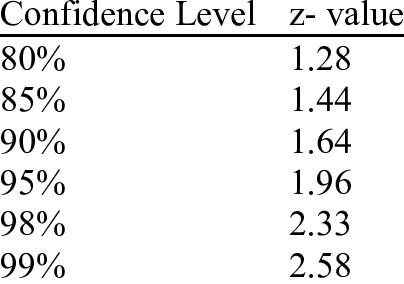

### Let's recalculate the confidence interval of of the mean of the bill length for the Adelie species

In [19]:
# sample mean and standard deviation for Adelie's bill length

sample_mean = bill_length_adelie.mean()

sample_std = bill_length_adelie.std()

print(sample_mean, sample_std)

38.79139072847682 2.6634048483686197


In [20]:
# clvl = 0.95, then z = 1.96 

z = 1.96
n = len(bill_length_adelie)

lower_limit_eq = sample_mean - ((z*sample_std)/np.sqrt(n))
upper_limit_eq = sample_mean + ((z*sample_std)/np.sqrt(n))

print(f'Calculated Confidence Interval of the average bill_length of Adelie is between {lower_limit_eq} and {upper_limit_eq}')


Calculated Confidence Interval of the average bill_length of Adelie is between 38.367970635318876 and 39.214810821634764


In [21]:
## look at the bootstrapped CI for the comparison

print(f'Bootstrapped Confidence Interval of the average bill_length of Adelie is between {lower_limit} and {upper_limit}')


Bootstrapped Confidence Interval of the average bill_length of Adelie is between 38.3641798541963 and 39.222372124433605


In [22]:
# add the folmula calculated limits to our comparison-dataframe

d1 = {
    'min': min_value,
    'mean': mean_bootstrap_means.round(3),
    'max' : max_value,
    'lower' : lower_limit.round(3),
    'upper' : upper_limit.round(3)
    }

d2= {
    'min': min_value,
    'mean': sample_mean.round(3),
    'max' : max_value,
    'lower' : lower_limit_eq.round(3),
    'upper' : upper_limit_eq.round(3)
    }

df_ci = pd.DataFrame([d1, d2], index=['bootstrap', 'equation'])
df_ci

,min,mean,max,lower,upper
bootstrap,32.1,38.787,46.0,38.364,39.222
equation,32.1,38.791,46.0,38.368,39.215


THE END__________________

# Optional / Bonus 

d:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


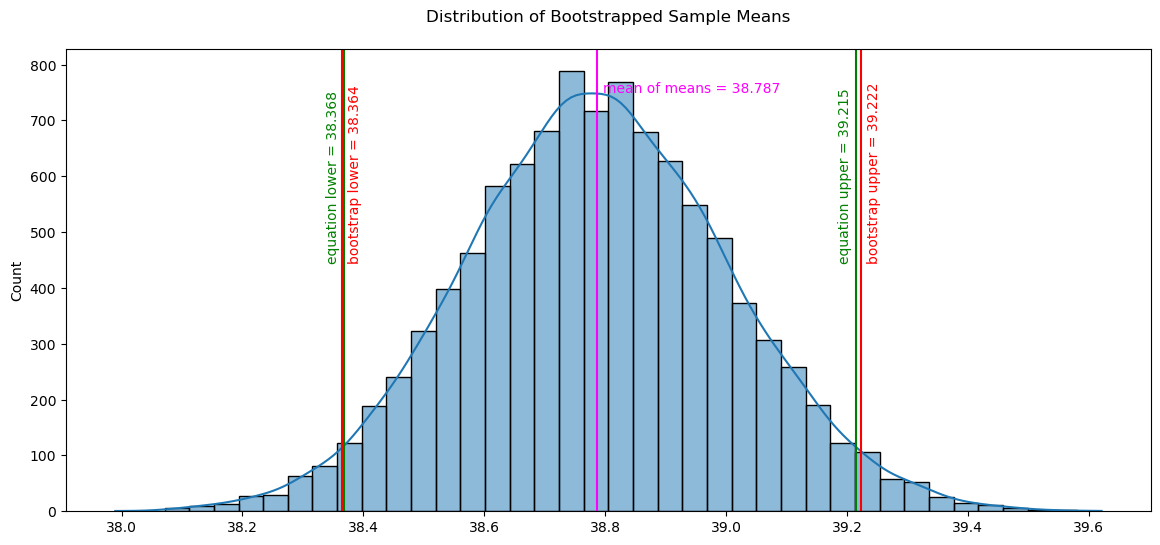

In [23]:
# post-lecture add-on: comparing the lower and upper limits (bootstrap vs equation) in our histogram

plt.figure(figsize=(14,6))

# Bootstrapped Means
sns.histplot(sample_means_list, kde=True, bins=40)

# line and value annotation for the mean of bootstrapped means
plt.axvline(x=mean_bootstrap_means, color='fuchsia')
plt.text(mean_bootstrap_means+0.01, 750, f'mean of means = {mean_bootstrap_means.round(3)}', color='fuchsia')

# lines and value annotations for lower/upper limits  from the bootstrapping method
plt.axvline(lower_limit, color='r')
plt.axvline(upper_limit, color='r')
plt.text(lower_limit+0.01, 450, f'bootstrap lower = {lower_limit.round(3)}', color='r', rotation = 90)
plt.text(upper_limit+0.01, 450, f'bootstrap upper = {upper_limit.round(3)}', color='r', rotation = 90)

# lines and value annotations for lower/upper limits calculated with the equation
plt.axvline(lower_limit_eq, color='g')
plt.axvline(upper_limit_eq, color='g')
plt.text(lower_limit_eq-0.03, 450, f'equation lower = {lower_limit_eq.round(3)}', color='g', rotation = 90)
plt.text(upper_limit_eq-0.03, 450, f'equation upper = {upper_limit_eq.round(3)}', color='g', rotation = 90)

plt.title('Distribution of Bootstrapped Sample Means', pad=20);

#### proportions of possible means (bootstraped) vs. original sample data distribution

In [ ]:
plt.figure(figsize=(13,6))

# Original Sample Data
sns.histplot(bill_length_adelie, bins=20, color='deepskyblue')
plt.ylim([0, 21])

# Bootstrapped Means
sns.histplot(sample_means_list, bins=40, ax=plt.twinx())
plt.ylim([0, 1000])

# line and value annotation for the mean of bootstrapped means
plt.axvline(x=mean_bootstrap_means, ymax=0.92, color='fuchsia', lw=3, ls='--')
plt.text(mean_bootstrap_means+0.01, 930, f'''mean of means 
{mean_bootstrap_means.round(3)}''', color='fuchsia', horizontalalignment='center')

# lines and value annotations for MIN and MAX of the original data
plt.axvline(min_value, color='black', lw=4, ls=':')
plt.axvline(max_value, color='black', lw=4, ls=':')
plt.text(min_value+0.2, 950, f'min = {min_value}')
plt.text(max_value-0.2, 950, f'max = {max_value}', horizontalalignment='right')

# lines and value annotations for lower/upper limits  from the BOOTSTRAPPING method
plt.axvline(lower_limit, ymin=0, ymax=0.5, color='r', lw=4, ls=':')
plt.axvline(upper_limit, ymin=0, ymax=0.5, color='r', lw=4, ls=':')
plt.text(lower_limit-0.1, 450, f'''bootstrap lower
{lower_limit.round(3)}''', color='r', horizontalalignment='right')
plt.text(upper_limit+0.1, 450,  f'''bootstrap upper 
{upper_limit.round(3)}''', color='r')

# lines and value annotations for lower/upper limits calculated with the EQUATION
plt.axvline(lower_limit_eq, ymin=0.5, ymax=0.9, color='b', lw=4, ls=':')
plt.axvline(upper_limit_eq,ymin=0.5, ymax=0.9, color='b', lw=4, ls=':')
plt.text(lower_limit_eq-0.1, 840, f'''equation lower
{lower_limit_eq.round(3)}''', color='b', horizontalalignment='right')
plt.text(upper_limit_eq+0.1, 840,  f'''equation upper 
{upper_limit_eq.round(3)}''', color='b')

plt.title('Distributions of Original Data vs Bootstrapped Sample Means', pad=20);

In [ ]:
df_ci

In [ ]:

plt.figure(figsize=(12,3))

ax = sns.barplot(df_ci, x = 'mean', y=df_ci.index, width=0.6)
ax.bar_label(ax.containers[0], padding=-50)
ax.margins(y=0.2)

plt.barh(y=df_ci.index, 
         left=df_ci['lower'], 
         width=df_ci['upper']-df_ci['lower'], 
         hatch = '//////',
         facecolor='none',
         height=0.6
         
        )
plt.text(lower_limit-0.1, -0.35, lower_limit.round(2), color='b', horizontalalignment='right')
plt.text(upper_limit+0.1, -0.35,  upper_limit.round(2), color='b')

plt.text(lower_limit_eq-0.1, 0.65, lower_limit_eq.round(2), color='b', horizontalalignment='right')
plt.text(upper_limit_eq+0.1, 0.65,  upper_limit_eq.round(2), color='b')

plt.title('Average Bill Length of Adelie penguins. Confidence Level: 95%', pad=20);